## Comparing RandomForest to Scikit-Learn


### S1: Filtering the data
- Load MNIST FASHION dataset (hint: use the practice notebook)
- Select a training set with the first n=100 samples from each category
- Select a testing set with the first n=100 samples from each category
- Create a numpy matrix named mat_avg defined as:
  A 10 x 2 matrix with the average intensity of all images in each category for the training and testing sets (rows: 10 categories, columns: average intensity in train set,  average intensity in test set)

Q1.1: Which category has the largest average intensity value in training data:  2

Q1.2: Which category has the largest average intensity value in testing data:   4

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist

In [ ]:

mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_subset = []
y_train_subset = []
for i in range(10):
    x_train_subset.append(x_train[y_train == i][:100])
    y_train_subset.append(y_train[y_train == i][:100])

x_test_subset = []
y_test_subset = []
for i in range(10):
    x_test_subset.append(x_test[y_test == i][:100])
    y_test_subset.append(y_test[y_test == i][:100])


mat_avg = np.zeros((10, 2))
for i in range(10):
    mat_avg[i, 0] = np.mean(x_train_subset[i])
    mat_avg[i, 1] = np.mean(x_test_subset[i])

max_train_avg = np.argmax(mat_avg[:, 0])
print("Category with largest average intensity in training data:", max_train_avg)


max_test_avg = np.argmax(mat_avg[:, 1])
print("Category with largest average intensity in testing data:", max_test_avg)



4422102/4422102 [==============================] - 0s 0us/step
Category with largest average intensity in training data: 2
Category with largest average intensity in testing data: 4


### S2: Finding the average image
- Find and display a single average image of all shoes (categories 'Sandal', 'Sneaker', 'Ankle boot') in training and testing data (use the smaller sample you created)

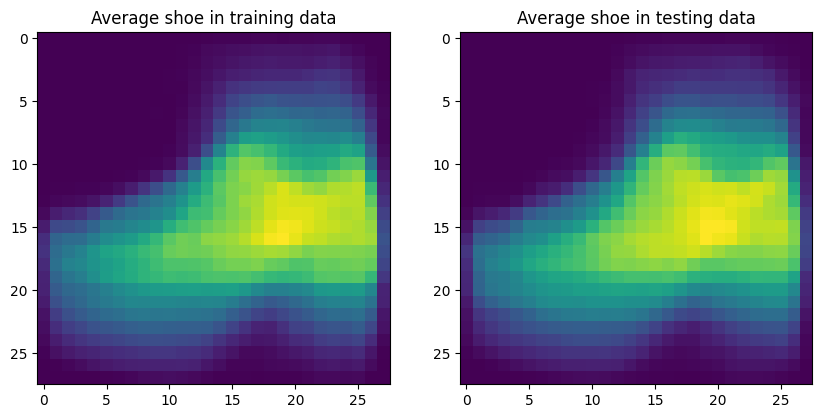

In [ ]:

x_train_shoes = np.concatenate((x_train_subset[5], x_train_subset[7], x_train_subset[9]), axis=0)
avg_shoe_train = np.mean(x_train_shoes, axis=0)

x_test_shoes = np.concatenate((x_test_subset[5], x_test_subset[7], x_test_subset[9]), axis=0)
avg_shoe_test = np.mean(x_test_shoes, axis=0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(avg_shoe_train, cmap='viridis')
plt.title('Average shoe in training data')

plt.subplot(1, 2, 2)
plt.imshow(avg_shoe_test, cmap='viridis')
plt.title('Average shoe in testing data')
plt.show()


### S3: Image distances
In the training set, find the shoe image that is most dissimilar from the mean shoe image. Show it as a 2D image
In the training set, find the shoe image that is most similar from the mean shoe image. Show it as a 2D image
Do the same for the testing set
Hint: You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | )

Q3.1: What is the index of most similar shoe image in the training set: 189

Q3.2: What is the index of most dissimilar shoe image in the training set: 236

Q3.1: What is the index of most dissimilar shoe image in the testing set: 257



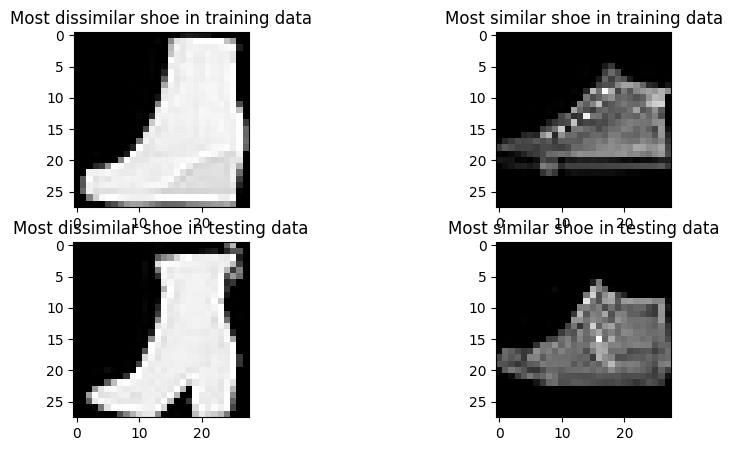

Most similar shoe index in training set: 189
Most dissimilar shoe index in training set: 236
Most dissimilar shoe index in testing set: 257


In [ ]:

distances_train = []
for i in range(len(x_train_shoes)):
    distance = np.linalg.norm(x_train_shoes[i].flatten() - avg_shoe_train.flatten())
    distances_train.append(distance)

most_dissimilar_train_index = np.argmax(distances_train)
most_dissimilar_train_image = x_train_shoes[most_dissimilar_train_index]

distances_train = []
for i in range(len(x_train_shoes)):
    distance = np.linalg.norm(x_train_shoes[i].flatten() - avg_shoe_train.flatten())
    distances_train.append(distance)

most_similar_train_index = np.argmin(distances_train)
most_similar_train_image = x_train_shoes[most_similar_train_index]

distances_test = []
for i in range(len(x_test_shoes)):
    distance = np.linalg.norm(x_test_shoes[i].flatten() - avg_shoe_test.flatten())
    distances_test.append(distance)

most_dissimilar_test_index = np.argmax(distances_test)
most_dissimilar_test_image = x_test_shoes[most_dissimilar_test_index]

distances_test = []
for i in range(len(x_test_shoes)):
    distance = np.linalg.norm(x_test_shoes[i].flatten() - avg_shoe_test.flatten())
    distances_test.append(distance)

most_similar_test_index = np.argmin(distances_test)
most_similar_test_image = x_test_shoes[most_similar_test_index]

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(most_dissimilar_train_image, cmap='gray')
plt.title('Most dissimilar shoe in training data')

plt.subplot(2, 2, 2)
plt.imshow(most_similar_train_image, cmap='gray')
plt.title('Most similar shoe in training data')

plt.subplot(2, 2, 3)
plt.imshow(most_dissimilar_test_image, cmap='gray')
plt.title('Most dissimilar shoe in testing data')

plt.subplot(2, 2, 4)
plt.imshow(most_similar_test_image, cmap='gray')
plt.title('Most similar shoe in testing data')

plt.show()

# Q3.1: What is the index of most similar shoe image in the training set:
print("Most similar shoe index in training set:", most_similar_train_index)

# Q3.2: What is the index of most dissimilar shoe image in the training set:
print("Most dissimilar shoe index in training set:", most_dissimilar_train_index)

# Q3.1: What is the index of most dissimilar shoe image in the testing set:
print("Most dissimilar shoe index in testing set:", most_dissimilar_test_index)



### S4: Train a classifier to differentiate shoes from no-shoes
- Create new labels for train and test images as shoes (1) or no-shoes (0)
- Train 2 different classifiers on the training set (SVM and Random Forest). Apply the classifiers on the testing data
- Display the confusion matrix of each classifier
- Display 4 images that are mis-classified as shoes by each classifier

Q1.1: What is the testing accuracy of each classifier:   
SVM, 0.9968

RandomForest: 0.999

Q1.2: What is the category (original label) that is most frequently mis-classified as a shoe:

Most frequently mis-classified as shoe (SVM): 8

Most frequently mis-classified as shoe (RF): 8

Q1.3: What is the category (original label) that is most frequently mis-classified as a non-shoe:  

Most frequently mis-classified as non-shoe (SVM): 5

Most frequently mis-classified as non-shoe (RF): 9

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
x_train_shoes = np.zeros(len(x_train_subset[2]) + len(x_train_subset[7]) + len(x_train_subset[9]))
x_test_shoes = np.zeros(len(x_test_subset[2]) + len(x_test_subset[7]) + len(x_test_subset[9]))

x_train_noshoes = np.ones(len(x_train) - len(x_train_shoes))
x_test_noshoes = np.ones(len(x_test) - len(x_test_shoes))

x_train_shoes_rf = np.concatenate((x_train_shoes, x_train_noshoes), axis=0)
x_test_shoes_rf = np.concatenate((x_test_shoes, x_test_noshoes), axis=0)


y_train_shoes = np.zeros(len(y_train_subset[2]) + len(y_train_subset[7]) + len(y_train_subset[9]))
y_test_shoes = np.zeros(len(y_test_subset[2]) + len(y_test_subset[7]) + len(y_test_subset[9]))

y_train_noshoes = np.ones(len(y_train) - len(y_train_shoes))
y_test_noshoes = np.ones(len(y_test) - len(y_test_shoes))

y_train_shoes_rf = np.concatenate((y_train_shoes, y_train_noshoes), axis=0)
y_test_shoes_rf = np.concatenate((y_test_shoes, y_test_noshoes), axis=0)

SVM Confusion Matrix:
[[6979   21]
 [  11 2989]]
Random Forest Confusion Matrix:
[[6993    7]
 [   5 2995]]


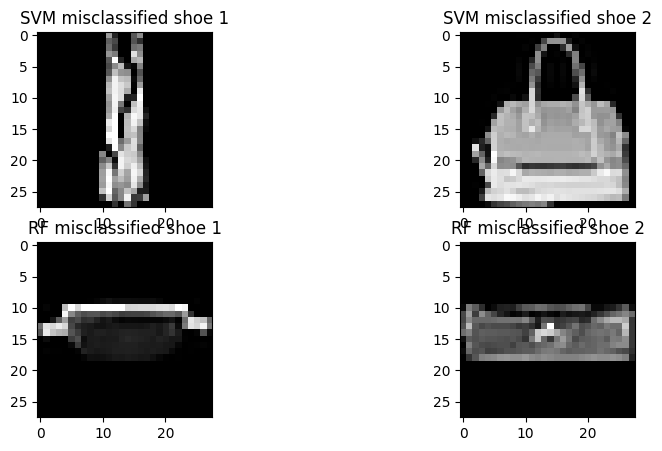

SVM testing accuracy: 0.9968
Random Forest testing accuracy: 0.9988
Most frequently mis-classified as shoe (SVM): 8
Most frequently mis-classified as shoe (RF): 8
Most frequently mis-classified as non-shoe (SVM): 5
Most frequently mis-classified as non-shoe (RF): 5


In [ ]:

new_y_train = np.zeros(len(y_train))
new_y_test = np.zeros(len(y_test))
for i in range(len(y_train)):
    if y_train[i] in [5, 7, 9]:
        new_y_train[i] = 1
    else:
        new_y_train[i] = 0
for i in range(len(y_test)):
    if y_test[i] in [5, 7, 9]:
        new_y_test[i] = 1
    else:
        new_y_test[i] = 0

svm_model = SVC(kernel='linear')
svm_model.fit(x_train.reshape(-1, 784), new_y_train)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train.reshape(-1, 784), new_y_train)


svm_predictions = svm_model.predict(x_test.reshape(-1, 784))
rf_predictions = rf_model.predict(x_test.reshape(-1, 784))


svm_cm = confusion_matrix(new_y_test, svm_predictions)
rf_cm = confusion_matrix(new_y_test, rf_predictions)

print("SVM Confusion Matrix:")
print(svm_cm)
print("Random Forest Confusion Matrix:")
print(rf_cm)

svm_misclassified_shoes = []
rf_misclassified_shoes = []
for i in range(len(svm_predictions)):
    if svm_predictions[i] == 1 and new_y_test[i] == 0:
        svm_misclassified_shoes.append(i)
for i in range(len(rf_predictions)):
    if rf_predictions[i] == 1 and new_y_test[i] == 0:
        rf_misclassified_shoes.append(i)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(x_test[svm_misclassified_shoes[0]], cmap='gray')
plt.title('SVM misclassified shoe 1')
plt.subplot(2, 2, 2)
plt.imshow(x_test[svm_misclassified_shoes[1]], cmap='gray')
plt.title('SVM misclassified shoe 2')
plt.subplot(2, 2, 3)
plt.imshow(x_test[rf_misclassified_shoes[0]], cmap='gray')
plt.title('RF misclassified shoe 1')
plt.subplot(2, 2, 4)
plt.imshow(x_test[rf_misclassified_shoes[1]], cmap='gray')
plt.title('RF misclassified shoe 2')
plt.show()


svm_accuracy = svm_model.score(x_test.reshape(-1, 784), new_y_test)
rf_accuracy = rf_model.score(x_test.reshape(-1, 784), new_y_test)
print("SVM testing accuracy:", svm_accuracy)
print("Random Forest testing accuracy:", rf_accuracy)


svm_misclassified_shoes_labels = []
for i in svm_misclassified_shoes:
    svm_misclassified_shoes_labels.append(y_test[i])
most_frequent_misclassified_shoe_label = max(set(svm_misclassified_shoes_labels), key=svm_misclassified_shoes_labels.count)
print("Most frequently mis-classified as shoe (SVM):", most_frequent_misclassified_shoe_label)

rf_misclassified_shoes_labels = []
for i in rf_misclassified_shoes:
    rf_misclassified_shoes_labels.append(y_test[i])
most_frequent_misclassified_shoe_label = max(set(rf_misclassified_shoes_labels), key=rf_misclassified_shoes_labels.count)
print("Most frequently mis-classified as shoe (RF):", most_frequent_misclassified_shoe_label)


svm_misclassified_noshoes_labels = []
for i in range(len(svm_predictions)):
    if svm_predictions[i] == 0 and new_y_test[i] == 1:
        svm_misclassified_noshoes_labels.append(y_test[i])
most_frequent_misclassified_noshoe_label = max(set(svm_misclassified_noshoes_labels), key=svm_misclassified_noshoes_labels.count)
print("Most frequently mis-classified as non-shoe (SVM):", most_frequent_misclassified_noshoe_label)

rf_misclassified_noshoes_labels = []
for i in range(len(rf_predictions)):
    if rf_predictions[i] == 0 and new_y_test[i] == 1:
        rf_misclassified_noshoes_labels.append(y_test[i])
most_frequent_misclassified_noshoe_label = max(set(rf_misclassified_noshoes_labels), key=rf_misclassified_noshoes_labels.count)
print("Most frequently mis-classified as non-shoe (RF):", most_frequent_misclassified_noshoe_label)


### Bonus:

- In question S4 you have a chance to discard one of image categories that are part of the non-shoe set. Which category would you prefer to discard? Explain and justify with data



The bottom two that are misclassified from the RandomForest model. These are the most "shoe-like" non-shoes that can misinform the model in terms of identifying shoes. The other two from SVM are obviously not shoes and can show themselves more as outliers, having a less hidden impact on the model.

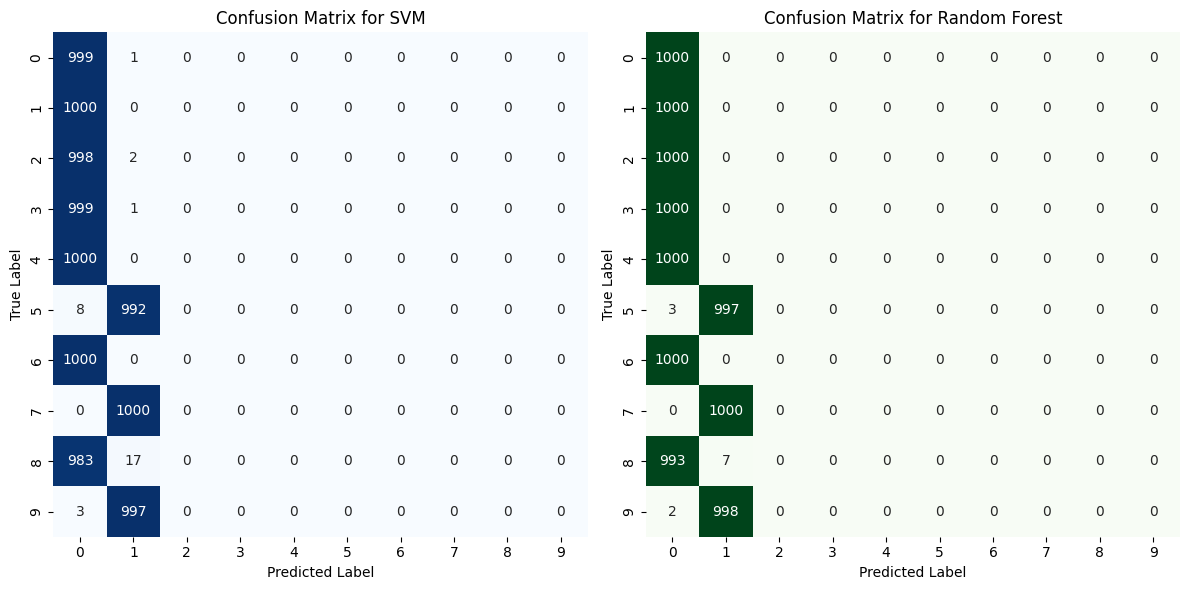

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test, svm_predictions)
rf_result = confusion_matrix(y_test, rf_predictions)

# other commparions, new_y_test (only 2 indexes),

plt.figure(figsize=(12, 6))

# Plot SVM Confusion Matrix
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.heatmap(result, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#plt.xticks(np.arange(len(xlabels)), labels, rotation=45)
#plt.yticks(np.arange(len(ylabels)), labels)

# Plot Random Forest Confusion Matrix
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.heatmap(rf_result, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#plt.xticks(np.arange(len(labels)), labels, rotation=45)
#plt.yticks(np.arange(len(labels)), labels)

plt.tight_layout()
plt.show()
